<a href="https://www.kaggle.com/code/bandhansingh/knn-classification-on-iris-dataset?scriptVersionId=93698589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
df['flower'] = df['target'].apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

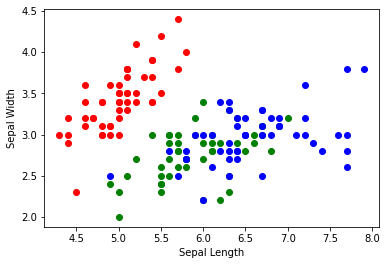

In [6]:
from matplotlib import pyplot as plt
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color='blue')

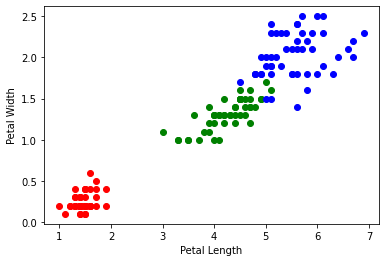

In [7]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='blue')

In [8]:
X = df.drop(['target','flower'], axis='columns')
y = df.target

In [9]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Using KNN Classifier**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
knn.score(X_test,y_test)

0.9666666666666667

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

Text(33.0, 0.5, 'Truth value')

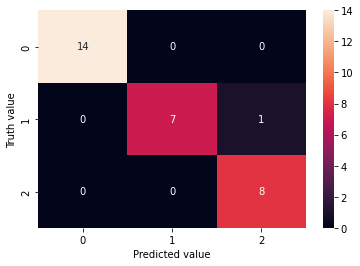

In [13]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Truth value')

Here we can see that our predictions are mostly correct except one case where our model predicted target value '2' but it is actually '1'

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

